In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
training_set, testing_set = imdb.load_data(num_words = 10000)
X_train, y_train = training_set
X_test, y_test = testing_set

In [3]:
print("Number of training samples = {}".format(X_train.shape[0]))
print("Number of testing samples = {}".format(X_test.shape[0]))

Number of training samples = 25000
Number of testing samples = 25000


In [4]:
from keras.preprocessing import sequence

In [5]:
X_train_padded = sequence.pad_sequences(X_train, maxlen = 100)
X_test_padded = sequence.pad_sequences(X_test, maxlen = 100)

In [6]:
print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))

X_train vector shape = (25000, 100)
X_test vector shape = (25000, 100)


In [7]:
from keras.models import Sequential

In [8]:
model=Sequential()

In [9]:
from keras.layers import Embedding

In [10]:
model.add(Embedding(input_dim = 10000, output_dim = 128))

In [11]:
from keras.layers import LSTM

In [12]:
model.add(LSTM(units=128))

In [13]:
from keras.layers import Dense
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [15]:
Optimizer='SGD'

model.compile(loss = 'binary_crossentropy', optimizer = Optimizer)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
#scores = model.fit(X_train_padded,y_train, epochs = 10, batch_size = 128, validation_data = (X_test_padded, y_test))

In [17]:
def train_model(Optimizer, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Embedding(input_dim = 10000,output_dim = 128))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = Optimizer,
                  metrics=['accuracy'])
    scores = model.fit(X_train,y_train,batch_size = 128,
                       epochs=10, 
                       validation_data = (X_val,y_val), 
                       verbose=1)
    return scores,model

In [18]:
SGD_score, SGD_model = train_model(Optimizer = 'sgd',
                                   X_train=X_train_padded, 
                                   y_train=y_train, 
                                   X_val=X_test_padded,
                                   y_val=y_test)
RMSprop_score, RMSprop_model = train_model(Optimizer = 'RMSprop',
                                           X_train=X_train_padded,
                                           y_train=y_train,
                                           X_val=X_test_padded,
                                           y_val=y_test)

Adam_score, Adam_model = train_model(Optimizer = 'adam',
                                     X_train=X_train_padded,
                                     y_train=y_train,
                                     X_val=X_test_padded,
                                     y_val=y_test)



Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.6931 - acc: 0.5023 - val_loss: 0.6931 - val_acc: 0.4969
Epoch 2/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.6931 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.5056
Epoch 3/10
25000/25000 [==============================] - 42s 2ms/step - loss: 0.6930 - acc: 0.5098 - val_loss: 0.6930 - val_acc: 0.5033
Epoch 4/10
25000/25000 [==============================] - 43s 2ms/step - loss: 0.6930 - acc: 0.5112 - val_loss: 0.6930 - val_acc: 0.5144
Epoch 5/10
25000/25000 [==============================] - 44s 2ms/step - loss: 0.6929 - acc: 0.5217 - val_loss: 0.6930 - val_acc: 0.5125
Epoch 6/10
25000/25000 [==============================] - 47s 2ms/step - loss: 0.6929 - acc: 0.5191 - val_loss: 0.6929 - val_acc: 0.5196
Epoch 7/10
25000/25000 [==============================] - 46s 2ms/step - loss: 0.6928 - acc: 0.5225 - val_loss: 0.6929 - val_ac

In [19]:
import matplotlib.pyplot as plt

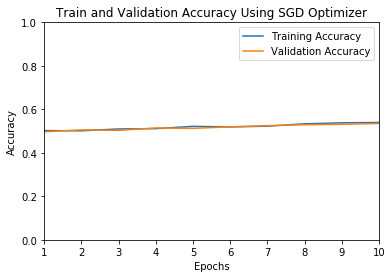

In [20]:
import numpy as np
ax1= plt.figure()
plt.plot(range(1,11), SGD_score.history['acc'],label='Training Accuracy')
plt.plot(range(1,11), SGD_score.history['val_acc'],label='Validation Accuracy')
plt.axis([1,10,0,1])
plt.title('Train and Validation Accuracy Using SGD Optimizer')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

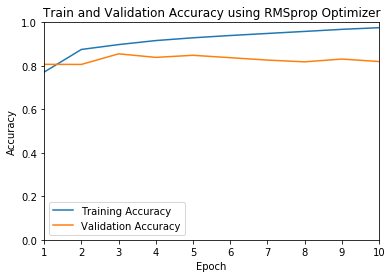

In [21]:
plt.plot(range(1,11), RMSprop_score.history['acc'], 
         label='Training Accuracy')
plt.plot(range(1,11), RMSprop_score.history['val_acc'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

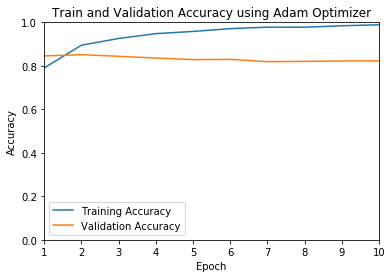

In [22]:
plt.plot(range(1,11), Adam_score.history['acc'], label='Training Accuracy')
plt.plot(range(1,11), Adam_score.history['val_acc'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(10,7))

y_test_pred = RMSprop_model.predict_classes(X_test_padded)
c_matrix = confusion_matrix(y_test, y_test_pred)


<Figure size 720x504 with 0 Axes>

Text(20.40624999999999, 0.5, 'Actual')

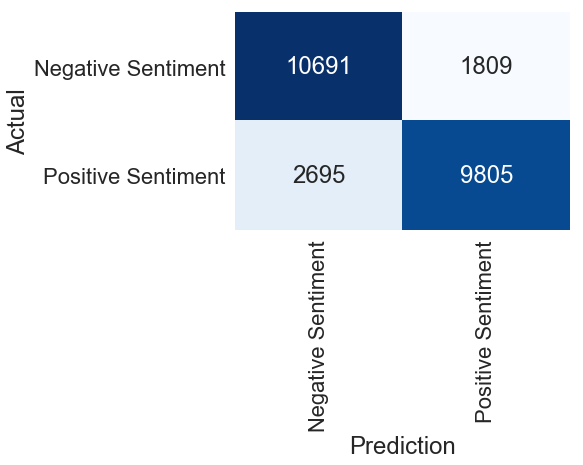

In [27]:
sns.set(font_scale=2)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 
                 'Positive Sentiment'], yticklabels=['Negative Sentiment', 
                 'Positive Sentiment'], cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")


In [29]:
false_negatives = []
false_positives = []
for i in range(len(y_test_pred)):
    if y_test_pred[i][0] != y_test[i]:
        if y_test[i] == 0: # False Positive
            false_positives.append(i)
        else:
            false_negatives.append(i)

